In [1]:
import pandas as pd
import sklearn
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from wordcloud import WordCloud,STOPWORDS

In [2]:
nyt = pd.read_csv('nyt_ftpg_1996_2006.csv', encoding='ISO-8859-1')

In [3]:
nyt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31034 entries, 0 to 31033
Data columns (total 18 columns):
Article_ID                31034 non-null int64
Date                      31034 non-null object
Article_Sequence          31034 non-null object
Title                     31034 non-null object
Summary                   31034 non-null object
Topic_6digit              31034 non-null int64
Topic_4digit              31034 non-null int64
Topic_2digit              31034 non-null int64
War on Terror             31034 non-null int64
Katrina                   31034 non-null int64
Israel/Palestine          31034 non-null int64
Immigration               31034 non-null int64
Presidential Elections    31034 non-null int64
Clinton Impeachment       31034 non-null int64
Enron                     31034 non-null int64
Darfur                    31034 non-null int64
Race/Ethnicity            31034 non-null int64
Schiavo                   31034 non-null int64
dtypes: int64(14), object(4)
memory usage

In [4]:
nyt.head()

,Article_ID,Date,Article_Sequence,Title,Summary,Topic_6digit,Topic_4digit,Topic_2digit,War on Terror,Katrina,Israel/Palestine,Immigration,Presidential Elections,Clinton Impeachment,Enron,Darfur,Race/Ethnicity,Schiavo
0,1,1/1/1996,a,Nation's Smaller Jails Struggle To Cope With S...,Jails overwhelmed with hardened criminals,120500,1205,12,0,0,0,0,0,0,0,0,0,0
1,2,1/1/1996,b,Dancing (and Kissing) In the New Year,new years activities,280000,2800,28,0,0,0,0,0,0,0,0,0,0
2,3,1/1/1996,c,Forbes's Silver Bullet for the Nation's Malaise,Steve Forbes running for President,201201,2012,20,0,0,0,0,1,0,0,0,0,0
3,4,1/1/1996,d,"Up at Last, Bridge to Bosnia Is Swaying Gatewa...",U.S. military constructs bridge to help their ...,160200,1602,16,0,0,0,0,0,0,0,0,0,0
4,5,1/1/1996,e,2 SIDES IN SENATE DISAGREE ON PLAN TO END FURL...,Democrats and Republicans can't agree on plan ...,201206,2012,20,0,0,0,0,0,0,0,0,0,0


In [5]:
from nltk.corpus import stopwords
import string

In [6]:
title1 = nyt['Title'][0]

In [7]:
title1

"Nation's Smaller Jails Struggle To Cope With Surge in Inmates "

In [8]:
def text_process(mess):
    """
    1. remove punc
    2. remove stop words
    3. return list of clean text words
    """

    nopunc = [char for char in mess if char not in string.punctuation]
    
    nopunc = ''.join(nopunc)

    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [9]:
text_process(title1)

['Nations', 'Smaller', 'Jails', 'Struggle', 'Cope', 'Surge', 'Inmates']

In [10]:
nyt_processed = nyt[['Title','Topic_2digit']]

In [11]:
nyt_processed.head()

,Title,Topic_2digit
0,Nation's Smaller Jails Struggle To Cope With S...,12
1,Dancing (and Kissing) In the New Year,28
2,Forbes's Silver Bullet for the Nation's Malaise,20
3,"Up at Last, Bridge to Bosnia Is Swaying Gatewa...",16
4,2 SIDES IN SENATE DISAGREE ON PLAN TO END FURL...,20


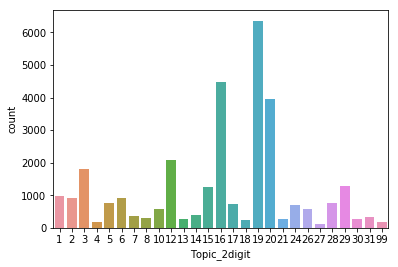

In [12]:
sns.countplot(data=nyt_processed, x='Topic_2digit')

In [13]:
nyt_processed['Topic_2digit'].value_counts()


19    6354
16    4479
20    3958
12    2088
3     1799
29    1273
15    1249
1      964
2      914
6      912
28     769
5      749
17     719
24     715
10     594
26     573
14     410
7      354
31     329
8      299
13     273
21     269
30     268
18     254
99     172
4      168
27     129
Name: Topic_2digit, dtype: int64

In [14]:
nyt['lenght'] = nyt['Title'].apply(len)

In [15]:
def countWord(title):
    return len(title.split())


In [16]:
countWord("Hi my name is Matheus")

5

In [17]:
nyt['CountWord']=nyt['Title'].apply(countWord)

In [18]:
nyt[['Title','CountWord']].head()

,Title,CountWord
0,Nation's Smaller Jails Struggle To Cope With S...,10
1,Dancing (and Kissing) In the New Year,7
2,Forbes's Silver Bullet for the Nation's Malaise,7
3,"Up at Last, Bridge to Bosnia Is Swaying Gatewa...",11
4,2 SIDES IN SENATE DISAGREE ON PLAN TO END FURL...,10


In [20]:
nyt['CountWord'].value_counts()

8     5337
9     4762
7     4410
10    3346
6     3126
11    1913
5     1818
4     1336
12    1064
3     1051
13     688
14     573
2      446
15     404
16     275
17     187
18      93
1       81
19      53
20      24
21      14
22      10
23       8
24       4
25       4
42       3
27       2
46       1
39       1
Name: CountWord, dtype: int64

In [171]:
b = nyt[nyt['CountWord'] > 5]
b['Topic_2digit'].value_counts()


19    5456
16    3919
20    3203
12    1882
3     1664
15    1066
6      820
2      817
1      781
29     768
5      675
24     620
17     616
28     587
10     517
26     409
14     364
7      325
31     274
8      272
13     242
21     231
18     221
30     207
4      154
99     106
27     106
Name: Topic_2digit, dtype: int64

In [64]:
test = nyt[nyt['Topic_2digit'] == 19]


In [68]:
t1 = test.sample(129, replace=False)

In [70]:
t2 = t1[['Title', 'Topic_2digit']]

In [71]:
t2.head()

,Title,Topic_2digit
27269,SUICIDE BOMBER KILLS 22 IN ATTACK AT AN IRAQ BANK,19
30913,Saudis Give U.S. A Grim What If,19
7152,Asia Feels Strain Most at Society's Margins,19
11290,THE ELITE'S CHOICE WINS HUGE VICTORY IN MEXICO...,19
11856,CHILEAN SOCIALIST NARROWLY ELECTED TO THE PRES...,19


In [77]:
def reverse_index(dataset):
    dataset = dataset.reindex(index=dataset.index[::-1])
    dataset = dataset.reset_index()
    dataset = dataset.drop('index',1)
    return dataset

In [81]:
t2 = reverse_index(t2)

In [83]:
t2.head()

,Title,Topic_2digit
0,SUICIDE BOMBER KILLS 22 IN ATTACK AT AN IRAQ BANK,19
1,Saudis Give U.S. A Grim What If,19
2,Asia Feels Strain Most at Society's Margins,19
3,THE ELITE'S CHOICE WINS HUGE VICTORY IN MEXICO...,19
4,CHILEAN SOCIALIST NARROWLY ELECTED TO THE PRES...,19


In [94]:
df = pd.DataFrame(columns=['Title', 'Topic'])
for i in range(5):
    df.loc[len(df)] = [t2['Title'][i], t2['Topic_2digit'][i]]

In [95]:
df

,Title,Topic
0,SUICIDE BOMBER KILLS 22 IN ATTACK AT AN IRAQ BANK,19
1,Saudis Give U.S. A Grim What If,19
2,Asia Feels Strain Most at Society's Margins,19
3,THE ELITE'S CHOICE WINS HUGE VICTORY IN MEXICO...,19
4,CHILEAN SOCIALIST NARROWLY ELECTED TO THE PRES...,19


In [172]:
def megafunction(df, coef):
    aux0 = nyt[nyt['CountWord'] > 5]
    aux1 = aux0[aux0['Topic_2digit'] == coef]
    aux2 = aux1.sample(106, replace=False)
    aux3 = aux2[['Title', 'Topic_2digit']]
    aux3 = reverse_index(aux3)
    for i in range(106):
        df.loc[len(df)] = [aux3['Title'][i], aux3['Topic_2digit'][i]]


In [102]:
df = pd.DataFrame(columns=['Title', 'Topic'])
megafunction(df, 1)

In [104]:
megafunction(df, 2)

In [106]:
megafunction(df,3)

In [107]:
megafunction(df,4)

In [173]:
nyt_processed = pd.DataFrame(columns=['Title', 'Topic_2digit'])

megafunction(nyt_processed,1)
megafunction(nyt_processed,2)
megafunction(nyt_processed,3)
megafunction(nyt_processed,4)
megafunction(nyt_processed,5)
megafunction(nyt_processed,6)
megafunction(nyt_processed,7)
megafunction(nyt_processed,8)
megafunction(nyt_processed,10)
megafunction(nyt_processed,12)
megafunction(nyt_processed,13)
megafunction(nyt_processed,14)
megafunction(nyt_processed,15)
megafunction(nyt_processed,16)
megafunction(nyt_processed,17)
megafunction(nyt_processed,18)
megafunction(nyt_processed,19)
megafunction(nyt_processed,20)
megafunction(nyt_processed,21)
megafunction(nyt_processed,24)
megafunction(nyt_processed,26)
megafunction(nyt_processed,27)
megafunction(nyt_processed,28)
megafunction(nyt_processed,29)
megafunction(nyt_processed,30)
megafunction(nyt_processed,31)
megafunction(nyt_processed,99)

In [174]:
nyt_processed['Topic_2digit'].value_counts()


99    106
15    106
2     106
3     106
4     106
5     106
6     106
7     106
8     106
10    106
12    106
13    106
14    106
16    106
31    106
17    106
18    106
19    106
20    106
21    106
24    106
26    106
27    106
28    106
29    106
30    106
1     106
Name: Topic_2digit, dtype: int64

In [175]:
nyt_processed.describe()
nyt_processed['Topic_2digit'] = nyt_processed['Topic_2digit'].astype(int) 


In [176]:
nyt_processed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2862 entries, 0 to 2861
Data columns (total 2 columns):
Title           2862 non-null object
Topic_2digit    2862 non-null int32
dtypes: int32(1), object(1)
memory usage: 55.9+ KB


In [137]:
from sklearn.feature_extraction.text import CountVectorizer

In [138]:
bow_transformer = CountVectorizer(analyzer=text_process).fit(nyt_processed['Title'])

In [139]:
print(len(bow_transformer.vocabulary_))

8126


In [140]:
nyt_bow = bow_transformer.transform(nyt_processed['Title'])

In [141]:
print('Shape of Sparse Matrix: ', nyt_bow.shape)

Shape of Sparse Matrix:  (3483, 8126)


In [142]:
nyt_bow.nnz

20360

In [143]:
sparsity = (100.0 * nyt_bow.nnz / (nyt_bow.shape[0] * nyt_bow.shape[1]))
print('sparsity: {}'.format((sparsity)))

sparsity: 0.07193619810409253


In [144]:
from sklearn.feature_extraction.text import TfidfTransformer

In [145]:
tfidf_transformer = TfidfTransformer().fit(nyt_bow)

In [146]:
nyt_tfidf = tfidf_transformer.transform(nyt_bow)

In [147]:
from sklearn.naive_bayes import MultinomialNB

In [151]:
nyt_model = MultinomialNB().fit(nyt_tfidf,nyt_processed['Topic_2digit'].astype(int))


In [152]:
all_pred = nyt_model.predict(nyt_tfidf)

In [153]:
from sklearn.model_selection import train_test_split

In [177]:
nyt_train,nyt_test,topic_train,topic_test = train_test_split(nyt_processed['Title'], nyt_processed['Topic_2digit'], test_size=0.3)

In [178]:
from sklearn.pipeline import Pipeline

In [179]:
from sklearn.ensemble import RandomForestClassifier

In [180]:
pipeline = Pipeline([
    ('bow',CountVectorizer(analyzer=text_process)),
    ('tfidf', TfidfTransformer()),
    ('classifier', MultinomialNB())
])

In [183]:
pipeline.fit(nyt_train, topic_train)

Pipeline(memory=None,
     steps=[('bow', CountVectorizer(analyzer=<function text_process at 0x000000000DD02A60>,
        binary=False, decode_error='strict', dtype=<class 'numpy.int64'>,
        encoding='utf-8', input='content', lowercase=True, max_df=1.0,
        max_features=None, min_df=1, ngram_range=(1, 1), preprocesso...f=False, use_idf=True)), ('classifier', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))])

In [184]:
predictions = pipeline.predict(nyt_test)

In [50]:
a = pd.Series(predictions)
    

In [52]:
a.value_counts()

19    5192
16    1807
20    1699
3      193
12     162
29     146
1       38
15      37
6       19
28       4
2        4
17       4
24       4
10       2
dtype: int64

In [185]:
from sklearn.metrics import classification_report

In [186]:
print(classification_report(topic_test,predictions))

             precision    recall  f1-score   support

          1       0.46      0.33      0.39        36
          2       0.42      0.12      0.19        41
          3       0.45      0.26      0.33        35
          4       0.78      0.40      0.53        35
          5       0.37      0.31      0.34        32
          6       0.44      0.68      0.53        25
          7       0.41      0.24      0.30        29
          8       0.34      0.52      0.41        31
         10       0.34      0.34      0.34        29
         12       0.29      0.24      0.26        33
         13       0.29      0.69      0.41        26
         14       0.12      0.39      0.18        23
         15       0.42      0.24      0.30        34
         16       0.33      0.61      0.43        28
         17       0.61      0.31      0.41        36
         18       0.40      0.68      0.50        28
         19       0.16      0.10      0.12        29
         20       0.41      0.36      0.39   

In [51]:
pipeline2 = Pipeline([
    ('bow',CountVectorizer(analyzer=text_process)),
    ('tfidf', TfidfTransformer()),
    ('classifier', RandomForestClassifier())
])

In [52]:
pipeline2.fit(nyt_train, topic_train)

Pipeline(memory=None,
     steps=[('bow', CountVectorizer(analyzer=<function text_process at 0x000000000D5942F0>,
        binary=False, decode_error='strict', dtype=<class 'numpy.int64'>,
        encoding='utf-8', input='content', lowercase=True, max_df=1.0,
        max_features=None, min_df=1, ngram_range=(1, 1), preprocesso...n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False))])

In [53]:
predictions2 = pipeline.predict(nyt_test)

In [54]:
print(classification_report(topic_test,predictions2))

             precision    recall  f1-score   support

          1       0.83      0.12      0.21       298
          2       1.00      0.02      0.04       272
          3       0.83      0.29      0.43       538
          4       0.00      0.00      0.00        59
          5       1.00      0.00      0.01       222
          6       0.91      0.04      0.07       268
          7       0.00      0.00      0.00       102
          8       0.00      0.00      0.00        91
         10       1.00      0.01      0.01       189
         12       0.77      0.20      0.32       636
         13       0.00      0.00      0.00        72
         14       0.00      0.00      0.00       103
         15       0.82      0.06      0.12       368
         16       0.50      0.68      0.58      1345
         17       1.00      0.01      0.02       218
         18       0.00      0.00      0.00        71
         19       0.33      0.89      0.48      1946
         20       0.52      0.76      0.62   

C:\Users\Matheus\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [55]:
nyt.describe()

,Article_ID,Topic_6digit,Topic_4digit,Topic_2digit,War on Terror,Katrina,Israel/Palestine,Immigration,Presidential Elections,Clinton Impeachment,Enron,Darfur,Race/Ethnicity,Schiavo
count,31034.000000,31034.000000,31034.000000,31034.000000,31034.000000,31034.000000,31034.000000,31034.000000,31034.000000,31034.000000,31034.000000,31034.000000,31034.000000,31034.000000
mean,15517.500000,164152.898660,1641.543855,16.279532,0.136205,0.005478,0.034253,0.012341,0.052459,0.014307,0.005993,0.000838,0.014951,0.000741
std,8958.888463,96256.828146,962.523270,9.661223,0.343012,0.073811,0.181881,0.110406,0.222954,0.118755,0.077186,0.028933,0.121360,0.027214
min,1.000000,10000.000000,100.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7759.250000,120800.000000,1208.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,15517.500000,170600.000000,1706.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,23275.750000,201000.000000,2010.000000,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,31034.000000,990000.000000,9900.000000,99.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [56]:
nyt_train.describe()

count                                    21723
unique                                   21308
top       CRISIS IN THE BALKANS: THE OVERVIEW;
freq                                        30
Name: Title, dtype: object

In [57]:
topic_train.describe()

count    21723.000000
mean        16.252359
std          9.491754
min          1.000000
25%         12.000000
50%         17.000000
75%         20.000000
max         99.000000
Name: Topic_2digit, dtype: float64

In [65]:
topic_test.value_counts()

19    1946
16    1345
20    1181
12     636
3      538
29     369
15     368
1      298
2      272
6      268
28     240
5      222
17     218
24     201
10     189
26     165
14     103
7      102
31      98
8       91
30      81
21      79
13      72
18      71
99      62
4       59
27      37
Name: Topic_2digit, dtype: int64

In [66]:
nyt_test.value_counts()

BASEBALL;                                                                                      14
CRISIS IN THE BALKANS: THE OVERVIEW;                                                           14
INTERNATIONAL BUSINESS;                                                                        13
TESTING OF A PRESIDENT: THE OVERVIEW;                                                          11
CONFLICT IN THE BALKANS: THE OVERVIEW;                                                          6
TESTING OF A PRESIDENT: THE PRESIDENT;                                                          5
 SALT LAKE 2002                                                                                 5
THE MARKETS: Market Place;                                                                      5
CRISIS IN THE BALKANS;                                                                          4
NUCLEAR ANXIETY: THE OVERVIEW;                                                                  4
TESTING OF A PRESIDE

Versão Com Stopwords

In [8]:
def text_process(mess):
    """
    1. remove punc
    2. remove stop words
    3. return list of clean text words
    """

    nopunc = [char for char in mess if char not in string.punctuation]
    
    nopunc = ''.join(nopunc)

    return [word for word in nopunc.split() ]

In [9]:
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 'her',
 'hers',
 'herself',
 'it',
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each',
 'few',
 'more',
 'most',
 'other',
 'some',
 'such',
 'no',
 'nor',
 '

In [29]:
nyt_processed['Topic_2digit'].value_counts()

19    6354
16    4479
20    3958
12    2088
3     1799
29    1273
15    1249
1      964
2      914
6      912
28     769
5      749
17     719
24     715
10     594
26     573
14     410
7      354
31     329
8      299
13     273
21     269
30     268
18     254
99     172
4      168
27     129
Name: Topic_2digit, dtype: int64